In [ ]:
!pip install ruptures

     |████████████████████████████████| 921kB 8.5MB/s 


In [ ]:
!pip install pymc3

In [ ]:
!pip install pystan

In [ ]:
!pip install pyro-ppl

     |████████████████████████████████| 634kB 7.7MB/s 


In [ ]:
!pip install changefinder

     |████████████████████████████████| 163kB 7.6MB/s 
  Created wheel for changefinder: filename=changefinder-0.3-cp37-none-any.whl size=3839 sha256=cfd2b495f1a49a6f9fa5a31b36a89d620523737c85c9daae48fe3cf9e2f1d994
  Stored in directory: /root/.cache/pip/wheels/ab/1c/de/3c0c0e4a6ee252b83ae19b252f3ae4f0a8ba4799c253afbd92
Successfully built changefinder


In [ ]:
!pip install bayesian-changepoint-detection

  Created wheel for bayesian-changepoint-detection: filename=bayesian_changepoint_detection-0.2.dev1-cp37-none-any.whl size=6156 sha256=cd13f555238ea2453ca017729b3d6354cb9b49037b2527d2c132691a64f69694
  Stored in directory: /root/.cache/pip/wheels/60/24/c8/91c388e50a4fabb6552b3fac2389acb6dd48d0fb81df100485
Successfully built bayesian-changepoint-detection


In [ ]:
!pip install bocd

  Created wheel for bocd: filename=bocd-0.1.2-cp37-none-any.whl size=5358 sha256=04fe72c698b7e157be4a9826a375dee41b48b9f6fe93f2d8c3ae412269f46c9a
  Stored in directory: /root/.cache/pip/wheels/30/c8/17/2b886c75480bda1be653a2102060ec504b09dbdda4edae2653
Successfully built bocd


In [ ]:
!pip install pwlf

  Created wheel for pwlf: filename=pwlf-2.0.4-cp37-none-any.whl size=16156 sha256=98c546a52396533358aa71fa47b0fdd13e8977be5af51e901b41331ac8e812e8
  Stored in directory: /root/.cache/pip/wheels/aa/b4/ef/2cb67a24a71a0d9dd93a5ba02f46106e9fa34dd2e3d9d8b4a0
  Created wheel for pyDOE: filename=pyDOE-0.3.8-cp37-none-any.whl size=18184 sha256=755f6c60bfce4dbfe8fc5a0af6b388102c1f9842045454f64527cf4cdfb95fcb
  Stored in directory: /root/.cache/pip/wheels/7c/c8/58/a6493bd415e8ba5735082b5e0c096d7c1f2933077a8ce34544
Successfully built pwlf pyDOE


In [ ]:
!pip install scipy

In [ ]:
!pip install pycaret

     |████████████████████████████████| 266kB 8.3MB/s 
     |████████████████████████████████| 276kB 11.5MB/s 
     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 2.0MB 12.0MB/s 
     |████████████████████████████████| 256kB 41.1MB/s 
     |████████████████████████████████| 174kB 40.1MB/s 
     |████████████████████████████████| 1.7MB 39.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.2MB 218kB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 6.8MB 41.4MB/s 
     |████████████████████████████████| 1.4MB 38.0MB/s 
     |████████████████████████████████| 112kB 43.0MB/s 
     |████████████████████████████████| 1.2MB 22.2MB/s 
     |████████████████████████████████| 112kB 48.5MB/s 
     |████████████████████████████████| 645kB 33.4MB

In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import datetime
import ruptures as rpt
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib.pyplot import figure
import changefinder
import pymc3 as pm
import pwlf
import bocd
#import bayesian_changepoint_detection
import pystan
import pyro
import cProfile

In [ ]:
df = pd.read_csv('result_example.csv')

#Converting column names in lower case
df.columns = [c.lower() for c in df.columns]

#Converting fscl_wk_end_dt column to datetime format
df['fscl_wk_end_dt'] = pd.to_datetime(df['fscl_wk_end_dt'])

df.set_index('fscl_wk_end_dt', inplace=True)
df

,curr_yr_sales_units
fscl_wk_end_dt,
2017-01-14,22914.0
2017-01-21,13806.0
2017-01-28,15608.0
2017-02-04,15737.0
2017-02-11,24320.0
...,...
2021-05-08,29966.0
2021-05-15,32193.0
2021-05-22,28560.0


In [ ]:
'''
Pruned Exact Linear Time (PELT) search method: The PELT method is an exact method, and generally produces quick and consistent results. It detects change points through the minimization of costs (4). The algorithm has a computational cost of O(n), where n is the number of data points.

Dynamic programming search method: This is an exact method, which has a considerable computational cost of O(Qn^2 ), where Q is the max number of change points and n is the number of data points.

Binary segmentation search method: This method is arguably the most established in literature (4). Binary segmentation is an approximate method with an efficient computational cost of O (n log n), where n is the number of data points (4). The algorithm works by iteratively applying a single change point method to the entire sequence to determine if a split exists. If a split is detected, then the sequence splits into two sub-sequences. The same process is then applied to both sub-sequences, and so on.

Window-based search method: This is a relatively simple approximate search method. The window-based search method “computes the discrepancy between two adjacent windows that move along with signal y” (6). When the two windows are highly dissimilar, a high discrepancy between the two values occurs, which is indicative of a change point. Upon generating a discrepancy curve, the algorithm locates optimal change point indices in the sequence.

https://techrando.com/2019/08/14/a-brief-introduction-to-change-point-detection-using-python/
'''

'\nPruned Exact Linear Time (PELT) search method: The PELT method is an exact method, and generally produces quick and consistent results. It detects change points through the minimization of costs (4). The algorithm has a computational cost of O(n), where n is the number of data points.\n\nDynamic programming search method: This is an exact method, which has a considerable computational cost of O(Qn^2 ), where Q is the max number of change points and n is the number of data points.\n\nBinary segmentation search method: This method is arguably the most established in literature (4). Binary segmentation is an approximate method with an efficient computational cost of O (n log n), where n is the number of data points (4). The algorithm works by iteratively applying a single change point method to the entire sequence to determine if a split exists. If a split is detected, then the sequence splits into two sub-sequences. The same process is then applied to both sub-sequences, and so on.\n\

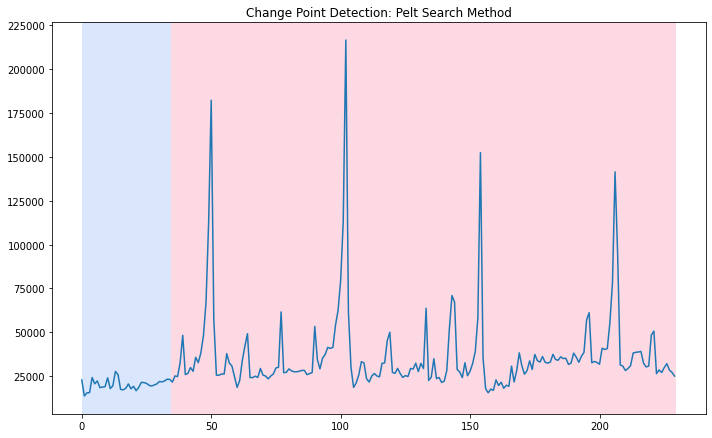

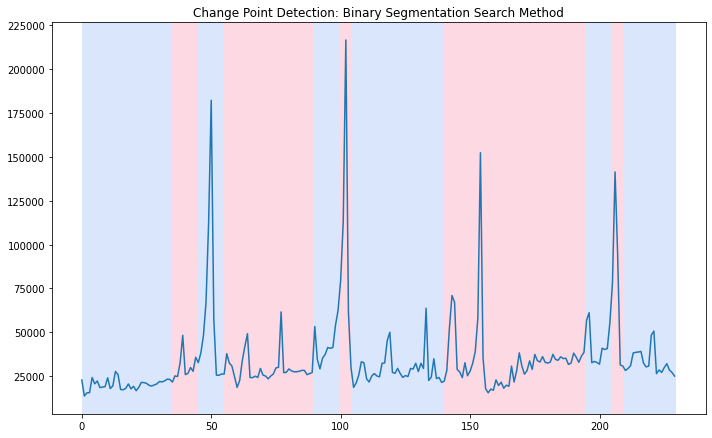

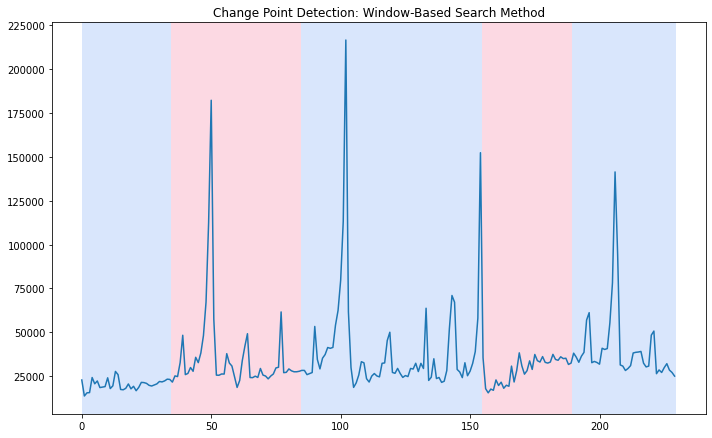

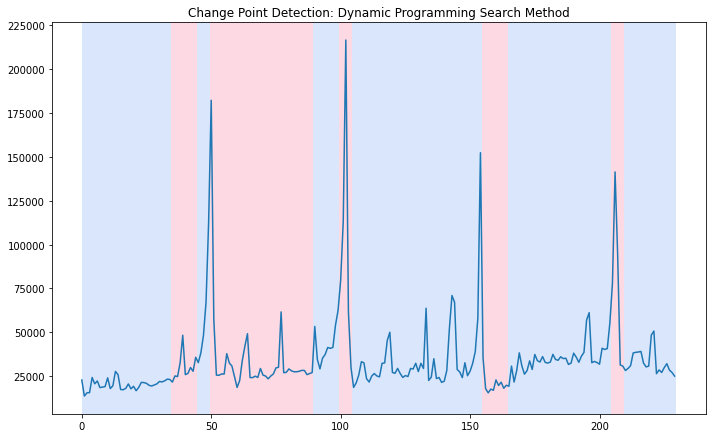

In [ ]:
#Convert the time series values to a numpy 1D array
points=np.array(df['curr_yr_sales_units'])
    
#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  
    
#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.show()
    
#Changepoint detection with window-based search method
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()
    
#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()

In [ ]:
df_1 = pd.read_csv('result_example_1.csv')

#Converting column names in lower case
df_1.columns = [c.lower() for c in df_1.columns]

#Converting fscl_wk_end_dt column to datetime format
df_1['fscl_wk_end_dt'] = pd.to_datetime(df_1['fscl_wk_end_dt'])

df_1.set_index('fscl_wk_end_dt', inplace=True)
df_1

,ptc,curr_yr_sales_units
fscl_wk_end_dt,,
2017-01-14,2.969094,22914.0
2017-01-21,3.566522,13806.0
2017-01-28,3.274839,15608.0
2017-02-04,3.311811,15737.0
2017-02-11,3.329290,24320.0
...,...,...
2021-05-08,3.537261,29966.0
2021-05-15,3.569514,32193.0
2021-05-22,3.568333,28560.0


In [ ]:
df_1.ptc.plot()

In [ ]:
df.curr_yr_sales_units.plot()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


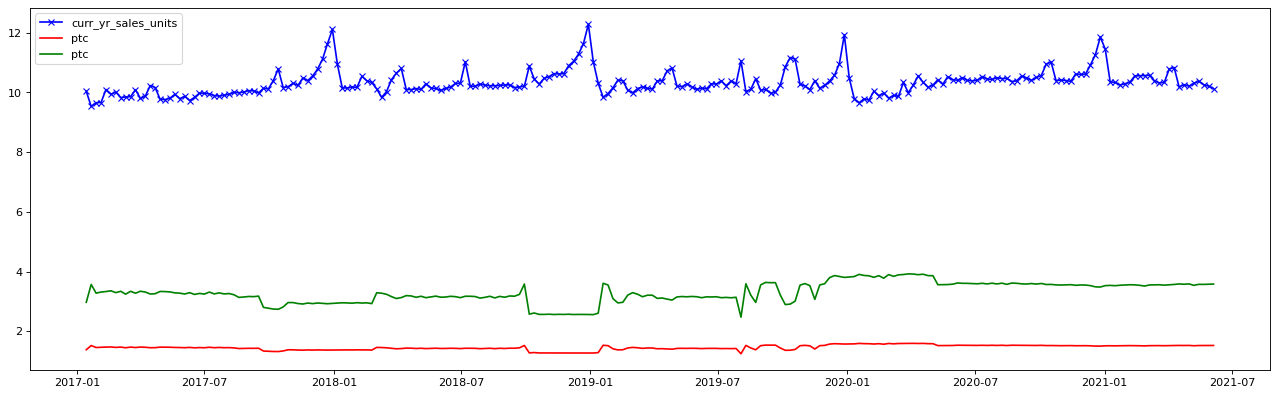

In [ ]:
figure(figsize=(20, 6), dpi=80)
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

std_scaled_units = std_scaler.fit_transform(df_1.curr_yr_sales_units.to_numpy().reshape(-1,1))
mm_scaled_units = mm_scaler.fit_transform(df_1.curr_yr_sales_units.to_numpy().reshape(-1,1))

std_scaled_ptc = std_scaler.fit_transform(df_1.ptc.to_numpy().reshape(-1,1))
mm_scaled_ptc = mm_scaler.fit_transform(df_1.ptc.to_numpy().reshape(-1,1))

plt.plot(np.log(df.curr_yr_sales_units+1), c='b', marker='x', label='curr_yr_sales_units')
plt.plot(np.log(df_1.ptc+1) , c='r', label='ptc')
plt.plot(df_1.ptc , c='g', label='ptc')
plt.legend(loc='upper left')
plt.show()



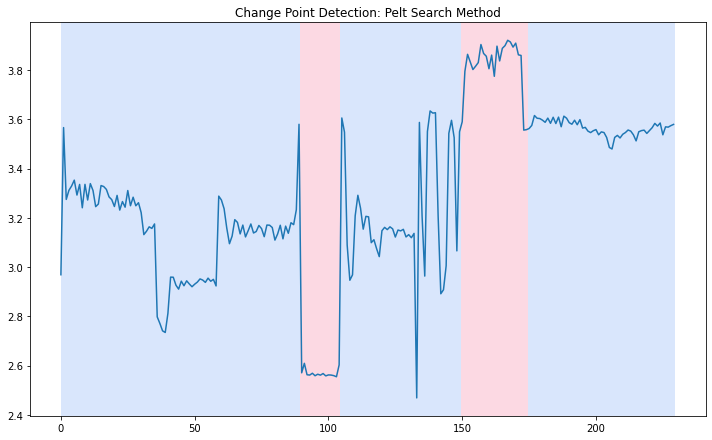

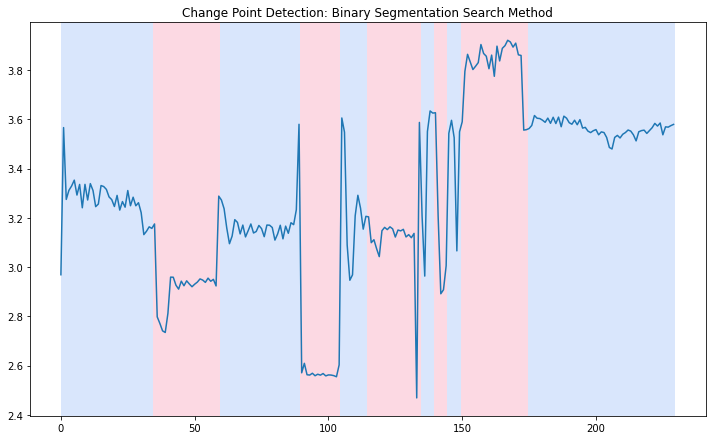

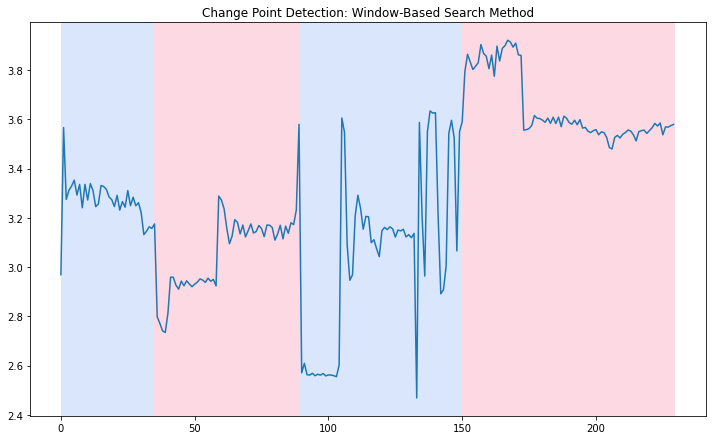

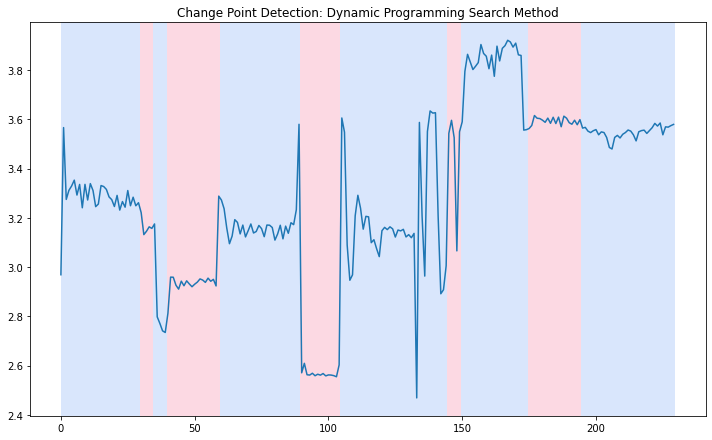

In [ ]:
#Convert the time series values to a numpy 1D array
points_1=np.array(df_1['ptc'])
    
#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points_1)
result = algo.predict(pen=10)
rpt.display(points_1, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  
    
#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points_1)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(points_1, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.show()
    
#Changepoint detection with window-based search method
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points_1)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points_1, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()
    
#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points_1)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points_1, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()

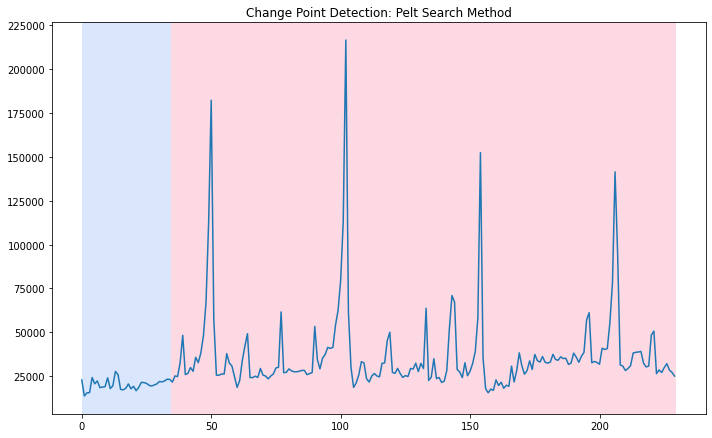

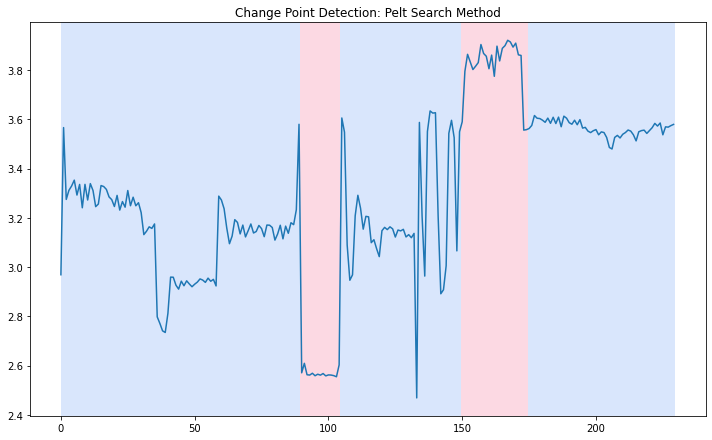

In [ ]:
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  

#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points_1)
result = algo.predict(pen=10)
rpt.display(points_1, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  

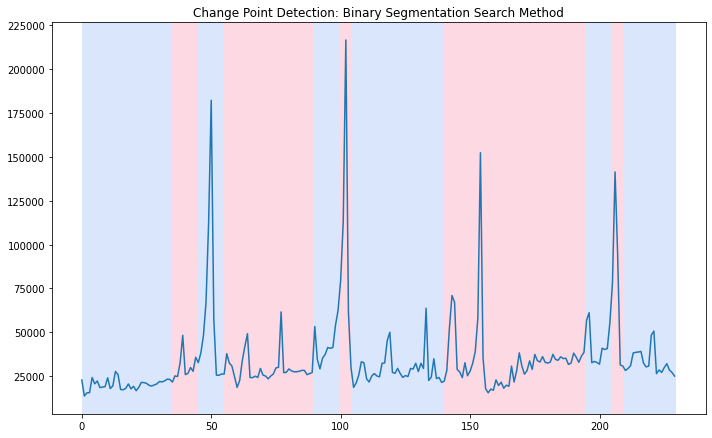

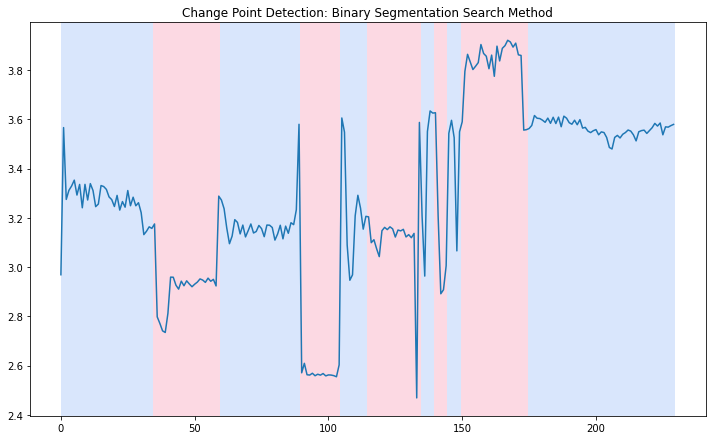

In [ ]:
#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.show()

#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points_1)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(points_1, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.show()

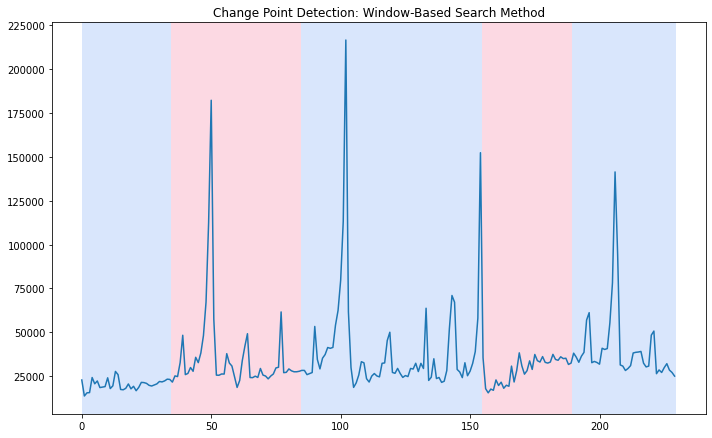

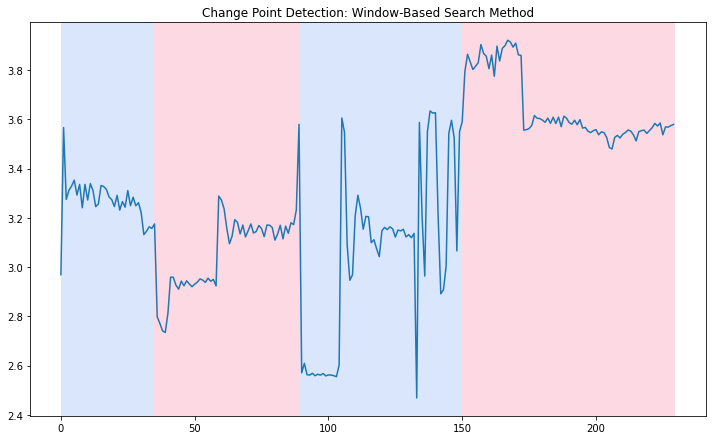

In [ ]:
#Changepoint detection with window-based search method
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()

#Changepoint detection with window-based search method
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points_1)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points_1, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()

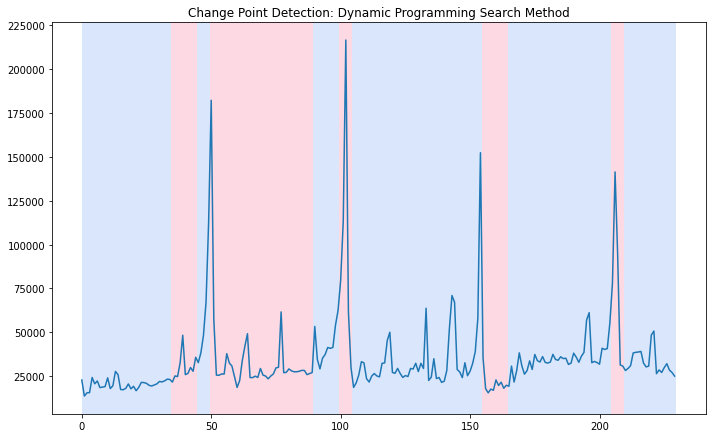

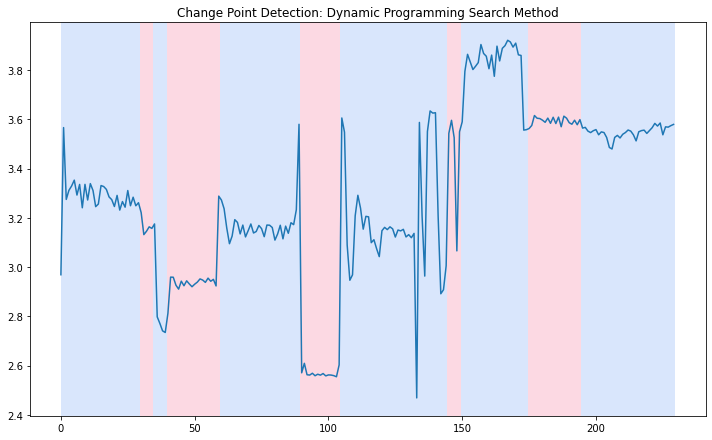

In [ ]:
#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()

#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points_1)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points_1, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()

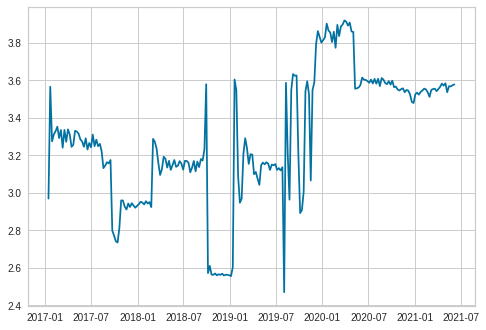

In [ ]:
# Initialize object
bc = bocd.BayesianOnlineChangePointDetection(bocd.ConstantHazard(300), bocd.StudentT(mu=0, kappa=1, alpha=1, beta=1))

# Online estimation and get the maximum likelihood r_t at each time point
rt_mle = np.empty(df_1.ptc.shape)
for i, d in enumerate(df_1.ptc):
    bc.update(d)
    rt_mle[i] = bc.rt

# Plot data with estimated change points
plt.plot(df_1.ptc, alpha=1, label="observation")
index_changes = np.where(np.diff(rt_mle)<0)[0]
plt.scatter(index_changes, df_1[index_changes], c='orange', label="change point")    

In [ ]:
import bayesian_changepoint_detection.offline_changepoint_detection as offcd
from functools import partial

Q, P, Pcp = offcd.offline_changepoint_detection(df_1.ptc, partial(offcd.const_prior, l=(len(df_1)+1)), offcd.gaussian_obs_log_likelihood, truncate=-40)

ImportError: ignored

In [ ]:
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd

from matplotlib import pylab as plt
%matplotlib inline
import scipy.stats

In [ ]:
!pip install PyMC3

In [ ]:
import pymc3 as pm

mod = pm.Model()

In [ ]:
df_ptc_plan = pd.read_csv('result_ptc_plan.csv')
#Converting column names in lower case
df_ptc_plan.columns = [c.lower() for c in df_ptc_plan.columns]

#Converting fscl_wk_end_dt column to datetime format
df_ptc_plan['corp_fiscal_week_num'] = pd.to_datetime(df_ptc_plan['fscl_wk_end_dt'])

df_ptc_plan.set_index('fscl_wk_end_dt', inplace=True)
df_ptc_plan.drop(columns=['corp_fiscal_week_num'], inplace=True)
df_ptc_plan

,ptc_plan
fscl_wk_end_dt,
2021-01-02,3.59
2021-01-09,3.62
2021-01-16,3.62
2021-01-23,3.62
2021-01-30,3.62
...,...
2022-11-26,0.00
2022-12-03,0.00
2022-12-10,0.00


In [ ]:
df_ptc_plan[df_ptc_plan.ptc_plan].groupby('ptc_plan').agg({"ptc_plan": "count"})

,ptc_plan
ptc_plan,
0.00,47
3.21,3
3.59,10
3.62,42
3.77,2


<Figure size 1600x480 with 0 Axes>

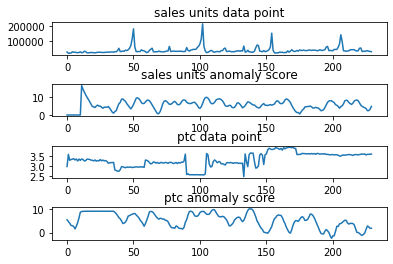

In [ ]:
 figure(figsize=(20, 6), dpi=80)

 #CHANGEFINDER PACKAGE
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
f.subplots_adjust(hspace=.9)

ax1.plot(points)
ax1.set_title("sales units data point")

#Initiate changefinder function
cf = changefinder.ChangeFinder()

scores = [cf.update(p) for p in points]
ax2.plot(scores)
ax2.set_title("sales units anomaly score")

ax3.plot(points_1)
ax3.set_title("ptc data point")

scores_1 = [cf.update(p) for p in points_1]
ax4.plot(scores_1)
ax4.set_title("ptc anomaly score")

plt.show()

In [ ]:
scores_1

[5.5066426059482705,
 4.7657618870734035,
 4.036648406690732,
 3.067136914883129,
 2.9608790328877315,
 2.5889598559086293,
 1.560959682271824,
 2.7319492392419296,
 4.286019681680353,
 6.317347921845423,
 8.799954146964168,
 9.080816158937065,
 9.16877396213937,
 9.20310972339488,
 9.216459637615522,
 9.221090106171959,
 9.222254577885417,
 9.222203513049251,
 9.221839020109448,
 9.221478374314016,
 9.221207400813153,
 9.221025581870224,
 9.220908932315277,
 9.220837836958314,
 9.22079411234385,
 9.22074372495506,
 9.220695860572217,
 9.220649361056388,
 9.220572950946856,
 9.220532453193464,
 9.220133231476442,
 9.214377722444532,
 9.208095985925599,
 9.202515507641806,
 9.197454760823954,
 9.196546774150294,
 8.784527299207584,
 8.14600321428364,
 7.347203996473658,
 6.455647393789352,
 5.930399508807256,
 5.017616506632962,
 3.891770205835292,
 4.077892156715391,
 4.548241662283244,
 5.63131839938617,
 7.1312141191114495,
 7.315490829487424,
 7.651542953945924,
 7.923163974537539,


In [ ]:
#fit your data (x and y)
myPWLF = pwlf.PiecewiseLinFit(df_1['curr_yr_sales_units'], df_1['ptc'])

#fit the data for n line segments
z = myPWLF.fit(5)

#calculate slopes
slopes = myPWLF.calc_slopes()

# predict for the determined points
xHat = df_1['curr_yr_sales_units']  
yHat = myPWLF.predict(xHat)

#calculate statistics
p = myPWLF.p_values(method='non-linear', step_size=1e-4) #p-values
se = myPWLF.se  # standard errors

print(p)
print(se)

[2.68902714e-94 5.43311416e-03 2.32637664e-04 9.99632140e-01
 9.99632490e-01 2.10257586e-01 9.15255161e-42 9.99728936e-01
 9.99728903e-01 2.20333152e-04]
[1.00613431e-01 1.23270924e-05 1.43101229e-05 3.47920858e+01
 3.47920851e+01 1.32794631e-05 1.51070151e+03 1.20085726e+08
 1.20171106e+08 4.05610530e+04]


In [ ]:
df_pred = pd.DataFrame(yHat, columns = ['ptc_pred'])
df_pred.index = df_1.index.to_list()
df_pred

,ptc_pred
2017-01-14,3.312310
2017-01-21,3.627578
2017-01-28,3.565203
2017-02-04,3.560738
2017-02-11,3.263642
...,...
2021-05-08,3.302245
2021-05-15,3.344424
2021-05-22,3.275616
2021-05-29,3.249820


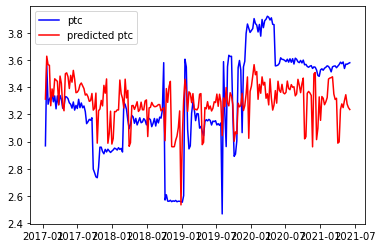

In [ ]:
plt.plot(df_1['ptc'], c='b', label='ptc')
plt.plot(df_pred['ptc_pred'] , c='r', label='predicted ptc')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#import anomaly detection module
from pycaret.anomaly import *
#intialize the setup
exp_ano = setup(df_1,silent=True)

,Description,Value
0,session_id,1273
1,Original Data,"(230, 2)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(230, 2)"
9,CPU Jobs,-1


In [ ]:
# create a knn model
knn = create_model('knn')
# assign a model 
knn_df = assign_model(knn)
knn_df

,ptc,curr_yr_sales_units,Anomaly,Anomaly_Score
fscl_wk_end_dt,,,,
2017-01-14,2.969094,22914.0,0,472.000040
2017-01-21,3.566522,13806.0,0,3255.000013
2017-01-28,3.274839,15608.0,0,1738.000001
2017-02-04,3.311811,15737.0,0,1609.000000
2017-02-11,3.329290,24320.0,0,56.000343
...,...,...,...,...
2021-05-08,3.537261,29966.0,0,390.000000
2021-05-15,3.569514,32193.0,0,277.000000
2021-05-22,3.568333,28560.0,0,260.000250


In [ ]:
# plot a model
plot_model(knn)

In [ ]:
# generate predictions using trained model
knn_predictions = predict_model(knn, data = df_1)
knn_predictions

,ptc,curr_yr_sales_units,Anomaly,Anomaly_Score
fscl_wk_end_dt,,,,
2017-01-14,2.969094,22914.0,0,320.000055
2017-01-21,3.566522,13806.0,0,3012.000013
2017-01-28,3.274839,15608.0,0,1453.000116
2017-02-04,3.311811,15737.0,0,1324.000112
2017-02-11,3.329290,24320.0,0,55.000199
...,...,...,...,...
2021-05-08,3.537261,29966.0,0,206.000415
2021-05-15,3.569514,32193.0,0,247.000404
2021-05-22,3.568333,28560.0,0,240.000002


In [ ]:
knn_predictions[knn_predictions.Anomaly == 1]

,ptc,curr_yr_sales_units,Anomaly,Anomaly_Score
fscl_wk_end_dt,,,,
2017-12-23,2.920372,112590.0,1,33035.000002
2017-12-30,2.930636,182086.0,1,68957.000001
2018-12-15,2.562405,79555.0,1,12365.000008
2018-12-22,2.561816,113129.0,1,33574.000000
2018-12-29,2.559438,216364.0,1,103235.000000
2019-10-12,2.908090,71000.0,1,7256.000013
2019-12-28,3.802120,152246.0,1,39656.000010
2020-12-19,3.485850,78243.0,1,11053.000010
2020-12-26,3.479603,141306.0,1,40780.000004


In [ ]:
df_1.ptc.describe()

count    230.000000
mean       3.294255
std        0.342206
min        2.469010
25%        3.122624
50%        3.263870
75%        3.566424
max        3.920976
Name: ptc, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7fe450b31750>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe450b36810>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe450b3c850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe450b3c310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe450b31d50>,
  <matplotlib.lines.Line2D at 0x7fe450b362d0>]}

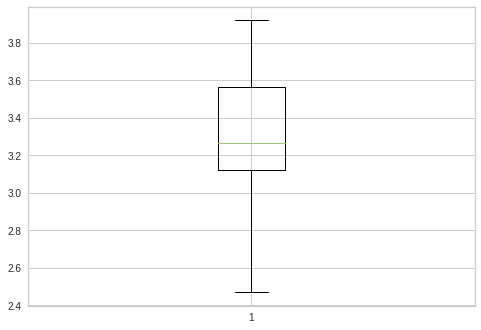

In [ ]:
plt.boxplot(df_1.ptc)

In [ ]:
(3.566424 - 3.122624) * 1.5, 3.122624 - ((3.566424 - 3.122624) * 1.5), 3.566424 + ((3.566424 - 3.122624) * 1.5)

(0.6657, 2.456924, 4.232124)